In [1]:
import librosa
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scripts import setup
from scripts.extract_audio_features import extract_zcr, extract_loudness, extract_rhythm, create_target_variable, pad_audio

In [2]:
gt_211 =  pd.read_csv("../ground_truth_data/GroundTruth_Muppets-02-01-01.csv", sep=";")
gt_244 =  pd.read_csv("../ground_truth_data/GroundTruth_Muppets-02-04-04.csv", sep=";")
gt_343 =  pd.read_csv("../ground_truth_data/GroundTruth_Muppets-03-04-03.csv", sep=";")

In [3]:
video_path = "../ground_truth_data/Muppets-02-01-01.avi"

In [4]:
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
intro = 15 * fps
gt_211_nointro = gt_211[gt_211["Frame_number"] >= (intro - 1)].reset_index(drop=True)

In [ ]:
gt_211.loc[gt_211["Frame_number"] == 38482]

,Video,Frame_number,Kermit,Pigs,Audio_Pigs,Cook,Audio_Cook,StatlerWaldorf,Audio_StatlerWaldorf,Audio_MissPiggy
38482,244,38482,0,0,0,0,0,0,0,0


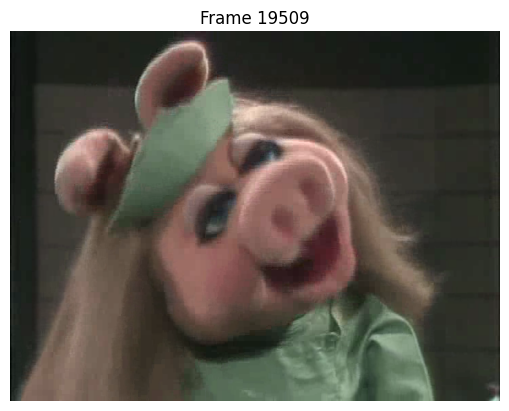

Frame 19509 saved as frame_19509.png


In [ ]:
video_path = "../ground_truth_data/Muppets-02-01-01.avi"

frame_number = 19509

cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()

if ret:
    # convert the frame from BGR (OpenCV format) to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off') 
    plt.title(f"Frame {frame_number}")
    plt.show()
else:
    print(f"Frame {frame_number} could not be found.")

cap.release()

In [7]:
muppet_files = {"Muppets-02-01-01.avi": "Muppets-02-01-01.csv", 
                "Muppets-02-04-04.avi": "Muppets-02-04-04.csv",
                "Muppets-03-04-03.avi": "Muppets-03-04-03.csv"}

data_path = "../ground_truth_data"
output_dir = "../ground_truth_data"

#setup.extract_audio(muppet_files, data_path, output_dir, sampling_rate=44100)

# Pigs audio

In [8]:
gt_211_nointro.loc[gt_211_nointro["Audio_Pigs"] == 1]

,Video,Frame_number,Kermit,Pigs,Audio_Pigs,Cook,Audio_Cook,StatlerWaldorf,Audio_StatlerWaldorf,Audio_MissPiggy
18143,211,18517,0,1,1,0,0,0,0,1
18144,211,18518,0,1,1,0,0,0,0,1
18145,211,18519,0,1,1,0,0,0,0,1
18146,211,18520,0,1,1,0,0,0,0,1
18147,211,18521,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
19159,211,19533,0,1,1,0,0,0,0,1
19160,211,19534,0,1,1,0,0,0,0,1
19161,211,19535,0,1,1,0,0,0,0,1
19162,211,19536,0,1,1,0,0,0,0,1


In [9]:
# split into train+validation and test set
train_val_annotations, test_annotations = train_test_split(gt_211, test_size=0.2, random_state=42, stratify=gt_211["Audio_Pigs"])
                                            
# split train+validation into train and validation sets
train_annotations, val_annotations = train_test_split(train_val_annotations, test_size=0.25, random_state=42) 

In [11]:
# Define constants
AUDIO_SAMPLING_RATE = 44100
FRAMES_PER_SECOND = 25
# Calculate expected length
expected_length = int(AUDIO_SAMPLING_RATE / FRAMES_PER_SECOND)

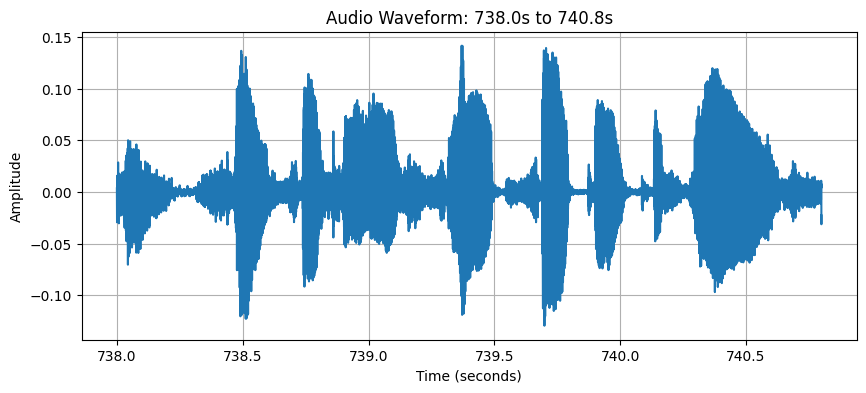

In [12]:
audio_path = "../ground_truth_data/Muppets-02-01-01.wav"

# Frame numbers for the range
frame_start = 18450
frame_end = 18520
fps = 25

# Convert frame numbers to timestamps (in seconds)
timestamp_start = frame_start / fps
timestamp_end = frame_end / fps

# Load audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)  # Use the original sampling rate

# Convert timestamps to samples
start_sample = int(timestamp_start * sr)
end_sample = int(timestamp_end * sr)

# Extract the audio segment
audio_segment = audio[start_sample:end_sample]

# Plot the waveform of the extracted audio segment
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(timestamp_start, timestamp_end, len(audio_segment)), audio_segment)
plt.title(f"Audio Waveform: {timestamp_start}s to {timestamp_end}s")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# Cook audio

In [13]:
gt_211_nointro.loc[gt_211_nointro["Audio_Cook"] == 1]

,Video,Frame_number,Kermit,Pigs,Audio_Pigs,Cook,Audio_Cook,StatlerWaldorf,Audio_StatlerWaldorf,Audio_MissPiggy
28599,211,28973,0,0,0,1,1,0,0,0
28600,211,28974,0,0,0,1,1,0,0,0
28601,211,28975,0,0,0,1,1,0,0,0
28602,211,28976,0,0,0,1,1,0,0,0
28603,211,28977,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29920,211,30294,0,0,0,1,1,0,0,0
29921,211,30295,0,0,0,1,1,0,0,0
29922,211,30296,0,0,0,1,1,0,0,0
29923,211,30297,0,0,0,1,1,0,0,0


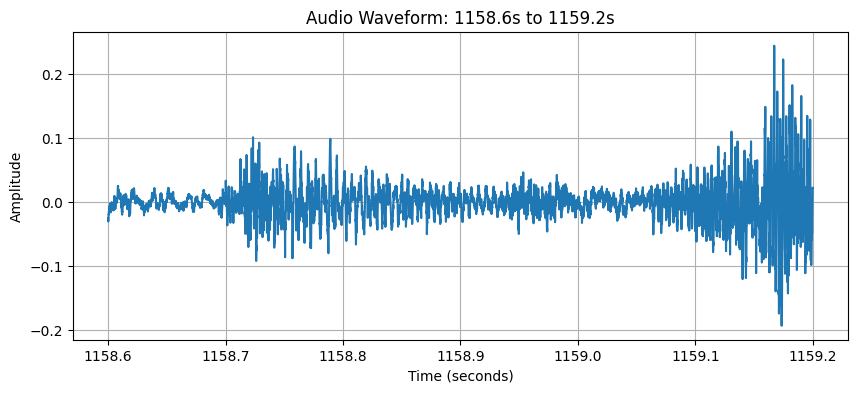

In [14]:
audio_path = "../ground_truth_data/Muppets-02-01-01.wav"

# Frame numbers for the range
frame_start = 28965
frame_end = 28980
fps = 25

# Convert frame numbers to timestamps (in seconds)
timestamp_start = frame_start / fps
timestamp_end = frame_end / fps

# Load audio file using librosa
audio, sr = librosa.load(audio_path, sr=None)  # Use the original sampling rate

# Convert timestamps to samples
start_sample = int(timestamp_start * sr)
end_sample = int(timestamp_end * sr)

# Extract the audio segment
audio_segment = audio[start_sample:end_sample]

# Plot the waveform of the extracted audio segment
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(timestamp_start, timestamp_end, len(audio_segment)), audio_segment)
plt.title(f"Audio Waveform: {timestamp_start}s to {timestamp_end}s")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()